### **EDA + Prediction Travel Package**

* DATASET : [HOLIDAY PACKAGE PREDICTION](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import re 
import matplotlib.patches
import warnings
warnings.filterwarnings('ignore')


In [2]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.5.2
0.12.2
1.4.4


**Importing the dataset**

In [3]:
data = pd.read_csv('dataset/Travel.csv')
data.head(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


# **EDA, INSIGHT & VISUALIZATION**

### **1. Descriptive Statistics**

**QUICK LOOK**

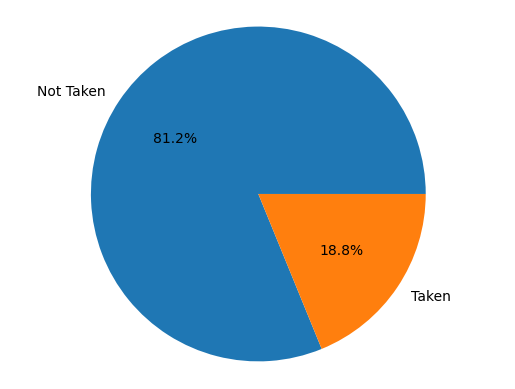

In [4]:
plt.pie(data['ProdTaken'].value_counts(), labels=['Not Taken', 'Taken'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [5]:
data.sample(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2849,202849,1,26.0,Self Enquiry,1,10.0,Small Business,Male,4,4.0,Basic,5.0,Divorced,7.0,0,5,1,2.0,Executive,22709.0
1875,201875,1,NaN,Self Enquiry,1,9.0,Small Business,Male,3,3.0,Basic,5.0,Married,6.0,0,5,1,1.0,Executive,NaN
2571,202571,1,20.0,Self Enquiry,3,29.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,1,2,0,2.0,Executive,20353.0


In [6]:
# NOTE:
# check for data type conformance
# age data type set to integer
# Set Column : NumberOfChildrenVisiting, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips to INT

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
# check for null values

data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECK FOR DUPLICATE DATA AND VALUE_COUNT (CATAGORICAL)**

In [8]:
# check the amount of data

print(f'Amount of data : {data.shape}')
print(f'Number of Duplicate Customer ID : {data.CustomerID.duplicated().sum()}')
print(f'Number of Duplicate Data : {data.duplicated().sum()}')

Amount of data : (4888, 20)
Number of Duplicate Customer ID : 0
Number of Duplicate Data : 0


In [9]:
# missing value
mv = data.isnull().sum()

#total missing value   
total_mv = mv.sum()

# Percentage of missing value
# percentage_mv = (total_mv / data.shape[0]) * 100
percentage_mv = mv*100/total_mv

# concat missing value and percentage missing value
mdf = pd.concat([mv, percentage_mv], axis=1, keys=['Total Missing Value', 'Percentage Missing Value'])
mdf

,Total Missing Value,Percentage Missing Value
CustomerID,0,0.000000
ProdTaken,0,0.000000
Age,226,22.332016
TypeofContact,25,2.470356
CityTier,0,0.000000
DurationOfPitch,251,24.802372
Occupation,0,0.000000
Gender,0,0.000000
NumberOfPersonVisiting,0,0.000000
NumberOfFollowups,45,4.446640


****OBSERVATION RESULT****

Based on the above output it can be concluded that:

- No Duplicated Data

- There are 9 columns that have missing values, that is :  `Age`,`TypeofContact`, `DurationOfPitch`,`NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisitin`, `MonthlyIncome`. 
- the columns have missing value,<5.1% , so it can be categorized as still relatively safe.
- Some columns with incorrect data types. (`NumberOfChildrenVisiting`,`DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `Age`)

In [10]:
# grouping the column by categorical, numerical, and diskrit
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num         = ['Age','DurationOfPitch','MonthlyIncome']
diskrit     = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar', 'NumberOfChildrenVisiting']

In [11]:
# let's cek unique value in categorical data

for i in categorical:
    print(data[i].value_counts(),end='\n\n')

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



**OBSERVATION REPORT**

- Missing values in columns : (`Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, `MonthlyIncome`). So it's need to handling missing value on Data Pre-Processing
- Typo or data input error in column `Gender` (Male, Female, Fe Male).
- In `MaritalStatus`, have similar meaning in value (Single, Unmarried)

In [12]:
#describe diskrit column

data[diskrit].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
OwnCar,4888.0,0.620295,0.485363,0.0,0.0,1.0,1.0,1.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0


In [13]:
# describe numerical column

data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [14]:
# describe categorical column

data[categorical].describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**OBSERVATION REPORT**

* In `NumberOfTrips` column,have *max* value = 22 and *min* value = 1. And have *mean* value = 3.23, its bigger than *median* value, this indicates that the data spread over on low values or it can be called with **positive skewed**
* On `MonthlyIncome`column, *mean* value is bigger than *median* value, it's called **positive skewe**
* On `MonthlyIncome` column, *standard deviation* value is too hight, this is means the data spread over too far from *mean* value, this is indicates the data have outlier

### **2. Univariate Analysis**

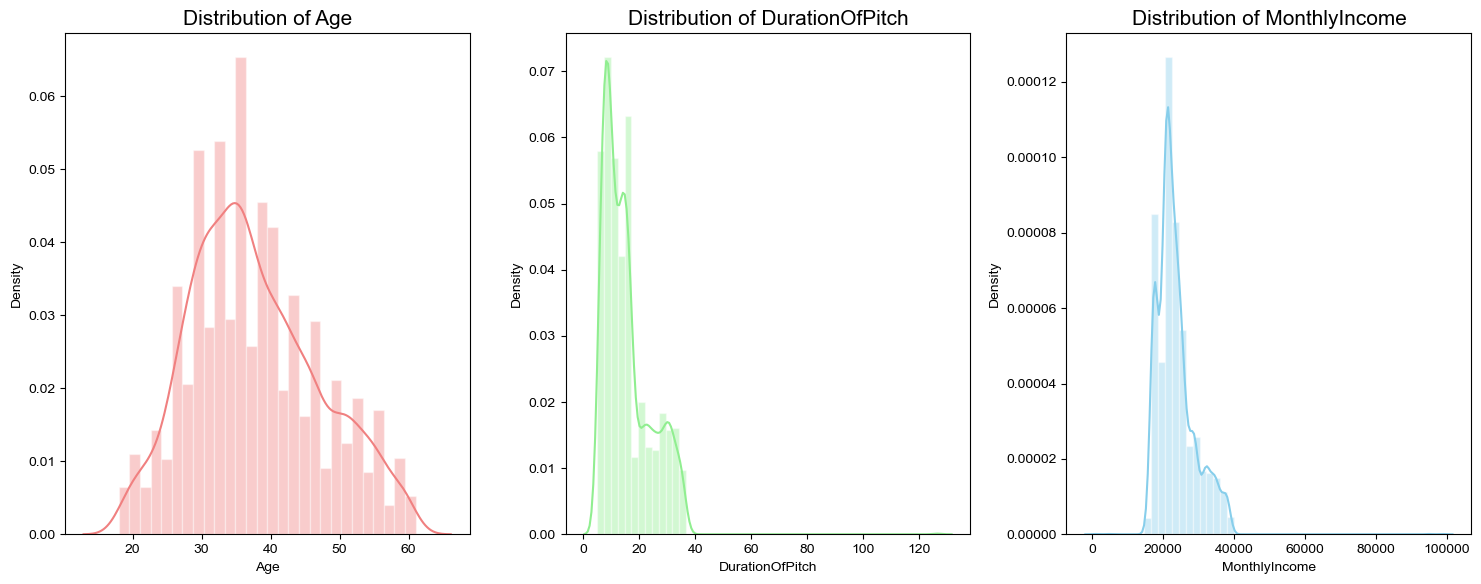

In [15]:

fig, axes = plt.subplots(1,3,figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['lightcoral','lightgreen','skyblue']

for i in range(len(num)):
    sns.distplot(data[num[i]], ax = axes[i], color=colors[i]) 
    axes[i].set_title(f'Distribution of {num[i]}',fontsize=15)

plt.tight_layout()
plt.show()

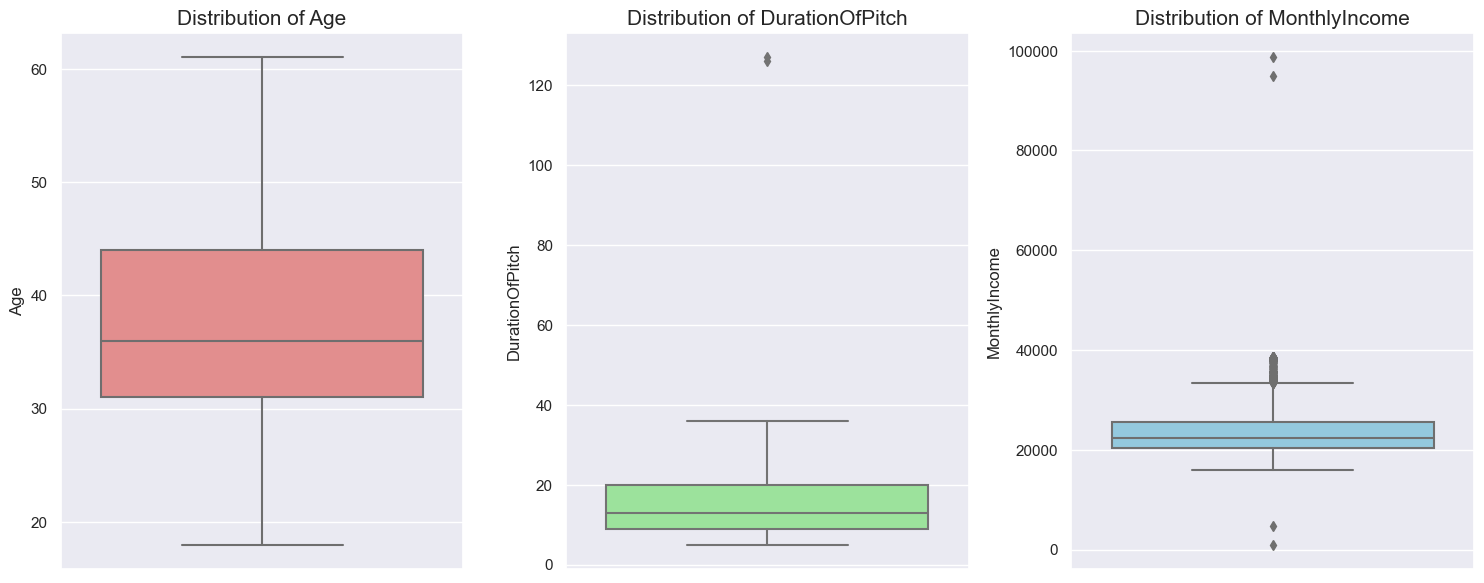

In [16]:
# create visualization for numerical data with boxplot

fig, axes = plt.subplots(1,3,figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['lightcoral','lightgreen','skyblue']

for i in range(len(num)):
    sns.boxplot(y = data[num[i]], ax = axes[i], color=colors[i]) 
    axes[i].set_title(f'Distribution of {num[i]}',fontsize=15)  

plt.tight_layout()
plt.show()

**INSIGHT DISPLOT & BOXPLOT**

* On `Age` column, it appears the data is normally distributed.
* On `DurationOfPitch` it appears the data is *positive skewed* , where most of data frequencies are spread over the values < 20 and outlier on value > 120.
* On `MonthlyIncome` column, spread over on 20K until 30K values, and outlier on value > 80K and < 10K.


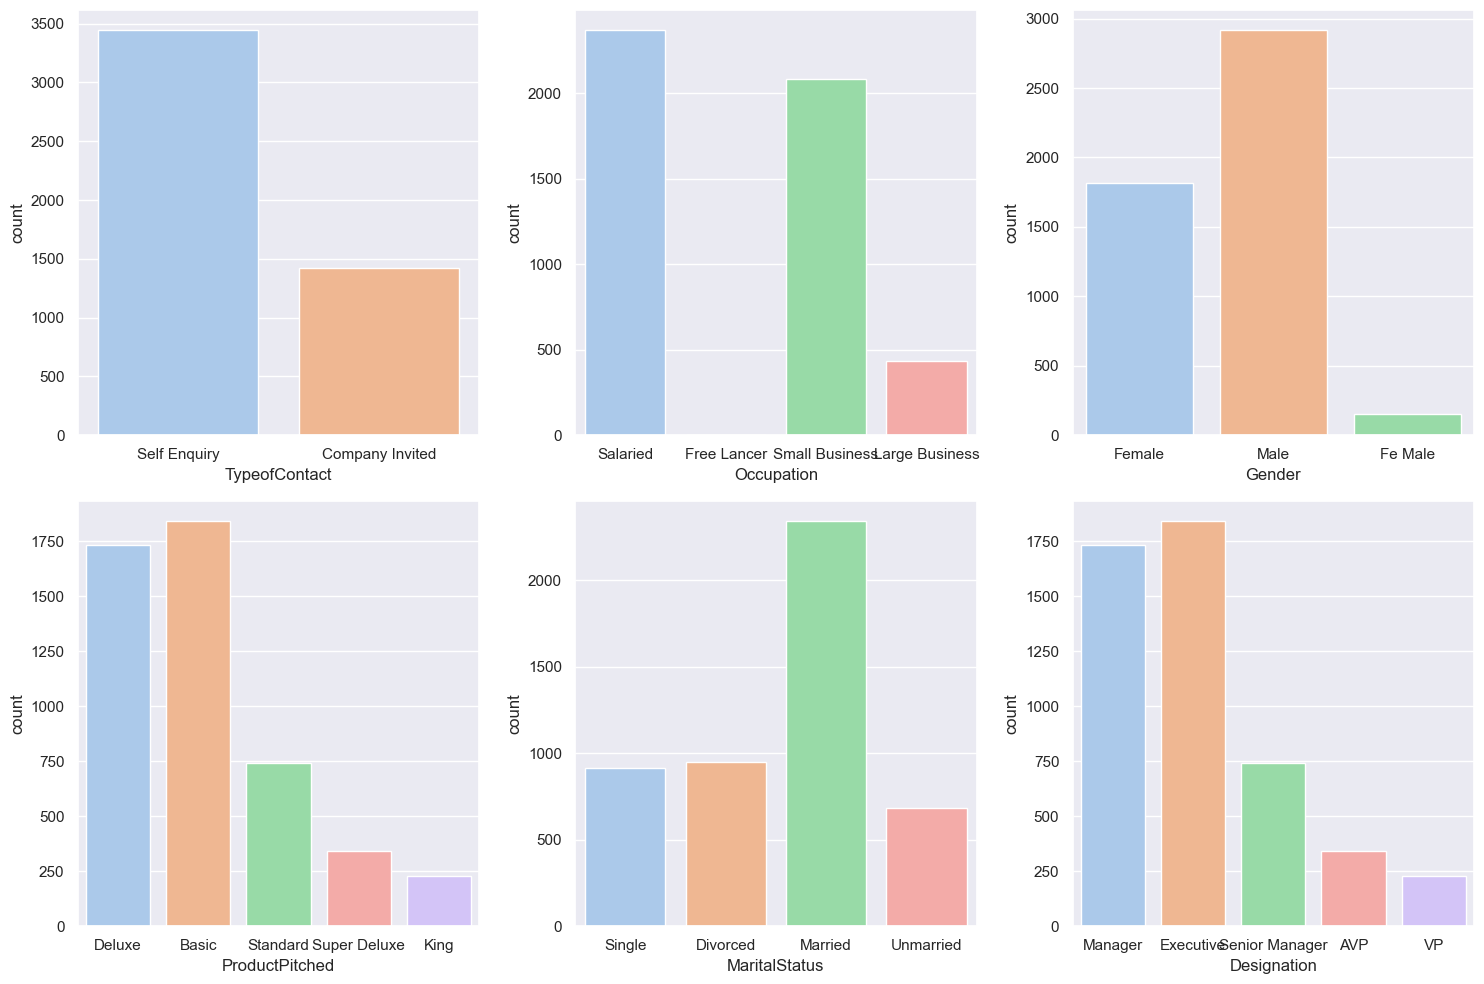

In [17]:
# let's create visualization for categorical data using countplot

fig, axes = plt.subplots(figsize=(15,10))
for i in range(len(categorical)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data,x=categorical[i] , palette='pastel')
    sns.set_theme(style="darkgrid", palette="pastel")

plt.tight_layout()

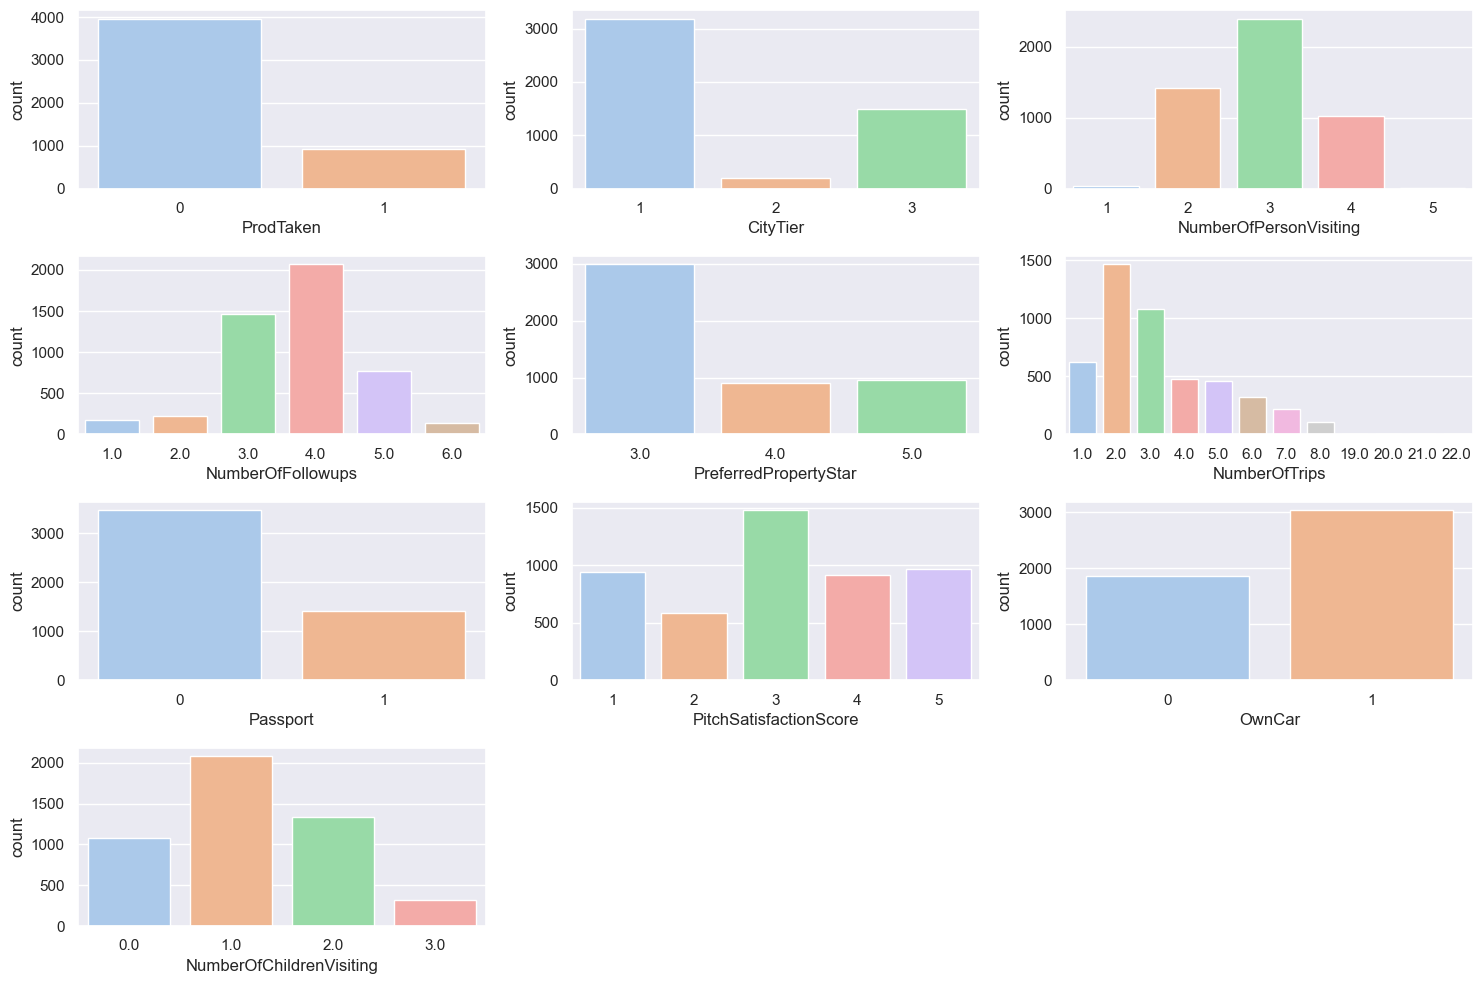

In [18]:
# let's create visualization for diskrit data using countplot

fig, axes = plt.subplots(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3,i+1)
    sns.countplot(data=data,x=diskrit[i] , palette='pastel')
    sns.set_theme(style="darkgrid", palette="pastel")

plt.tight_layout()

**INSIGHT COUNTPLOT**

* On `ProdTaken` column, found the imbalance data value, which customers who take holiday packages (`ProdTaken` = 1) have frequencies below < 1000 and customers didn't take the holiday packages (`ProdTaken` =0 ) is over 4000 customers. Imbalance data must be processed with undersampling or oversampling during data preprocessing later.
* Most of customers are *Male*, have *Married*, as *Manager* or *Eecutive*, and have an occupation *Salaried* and *Small Business*

### **3. Multivariate Analysis**

<Figure size 2000x2000 with 0 Axes>

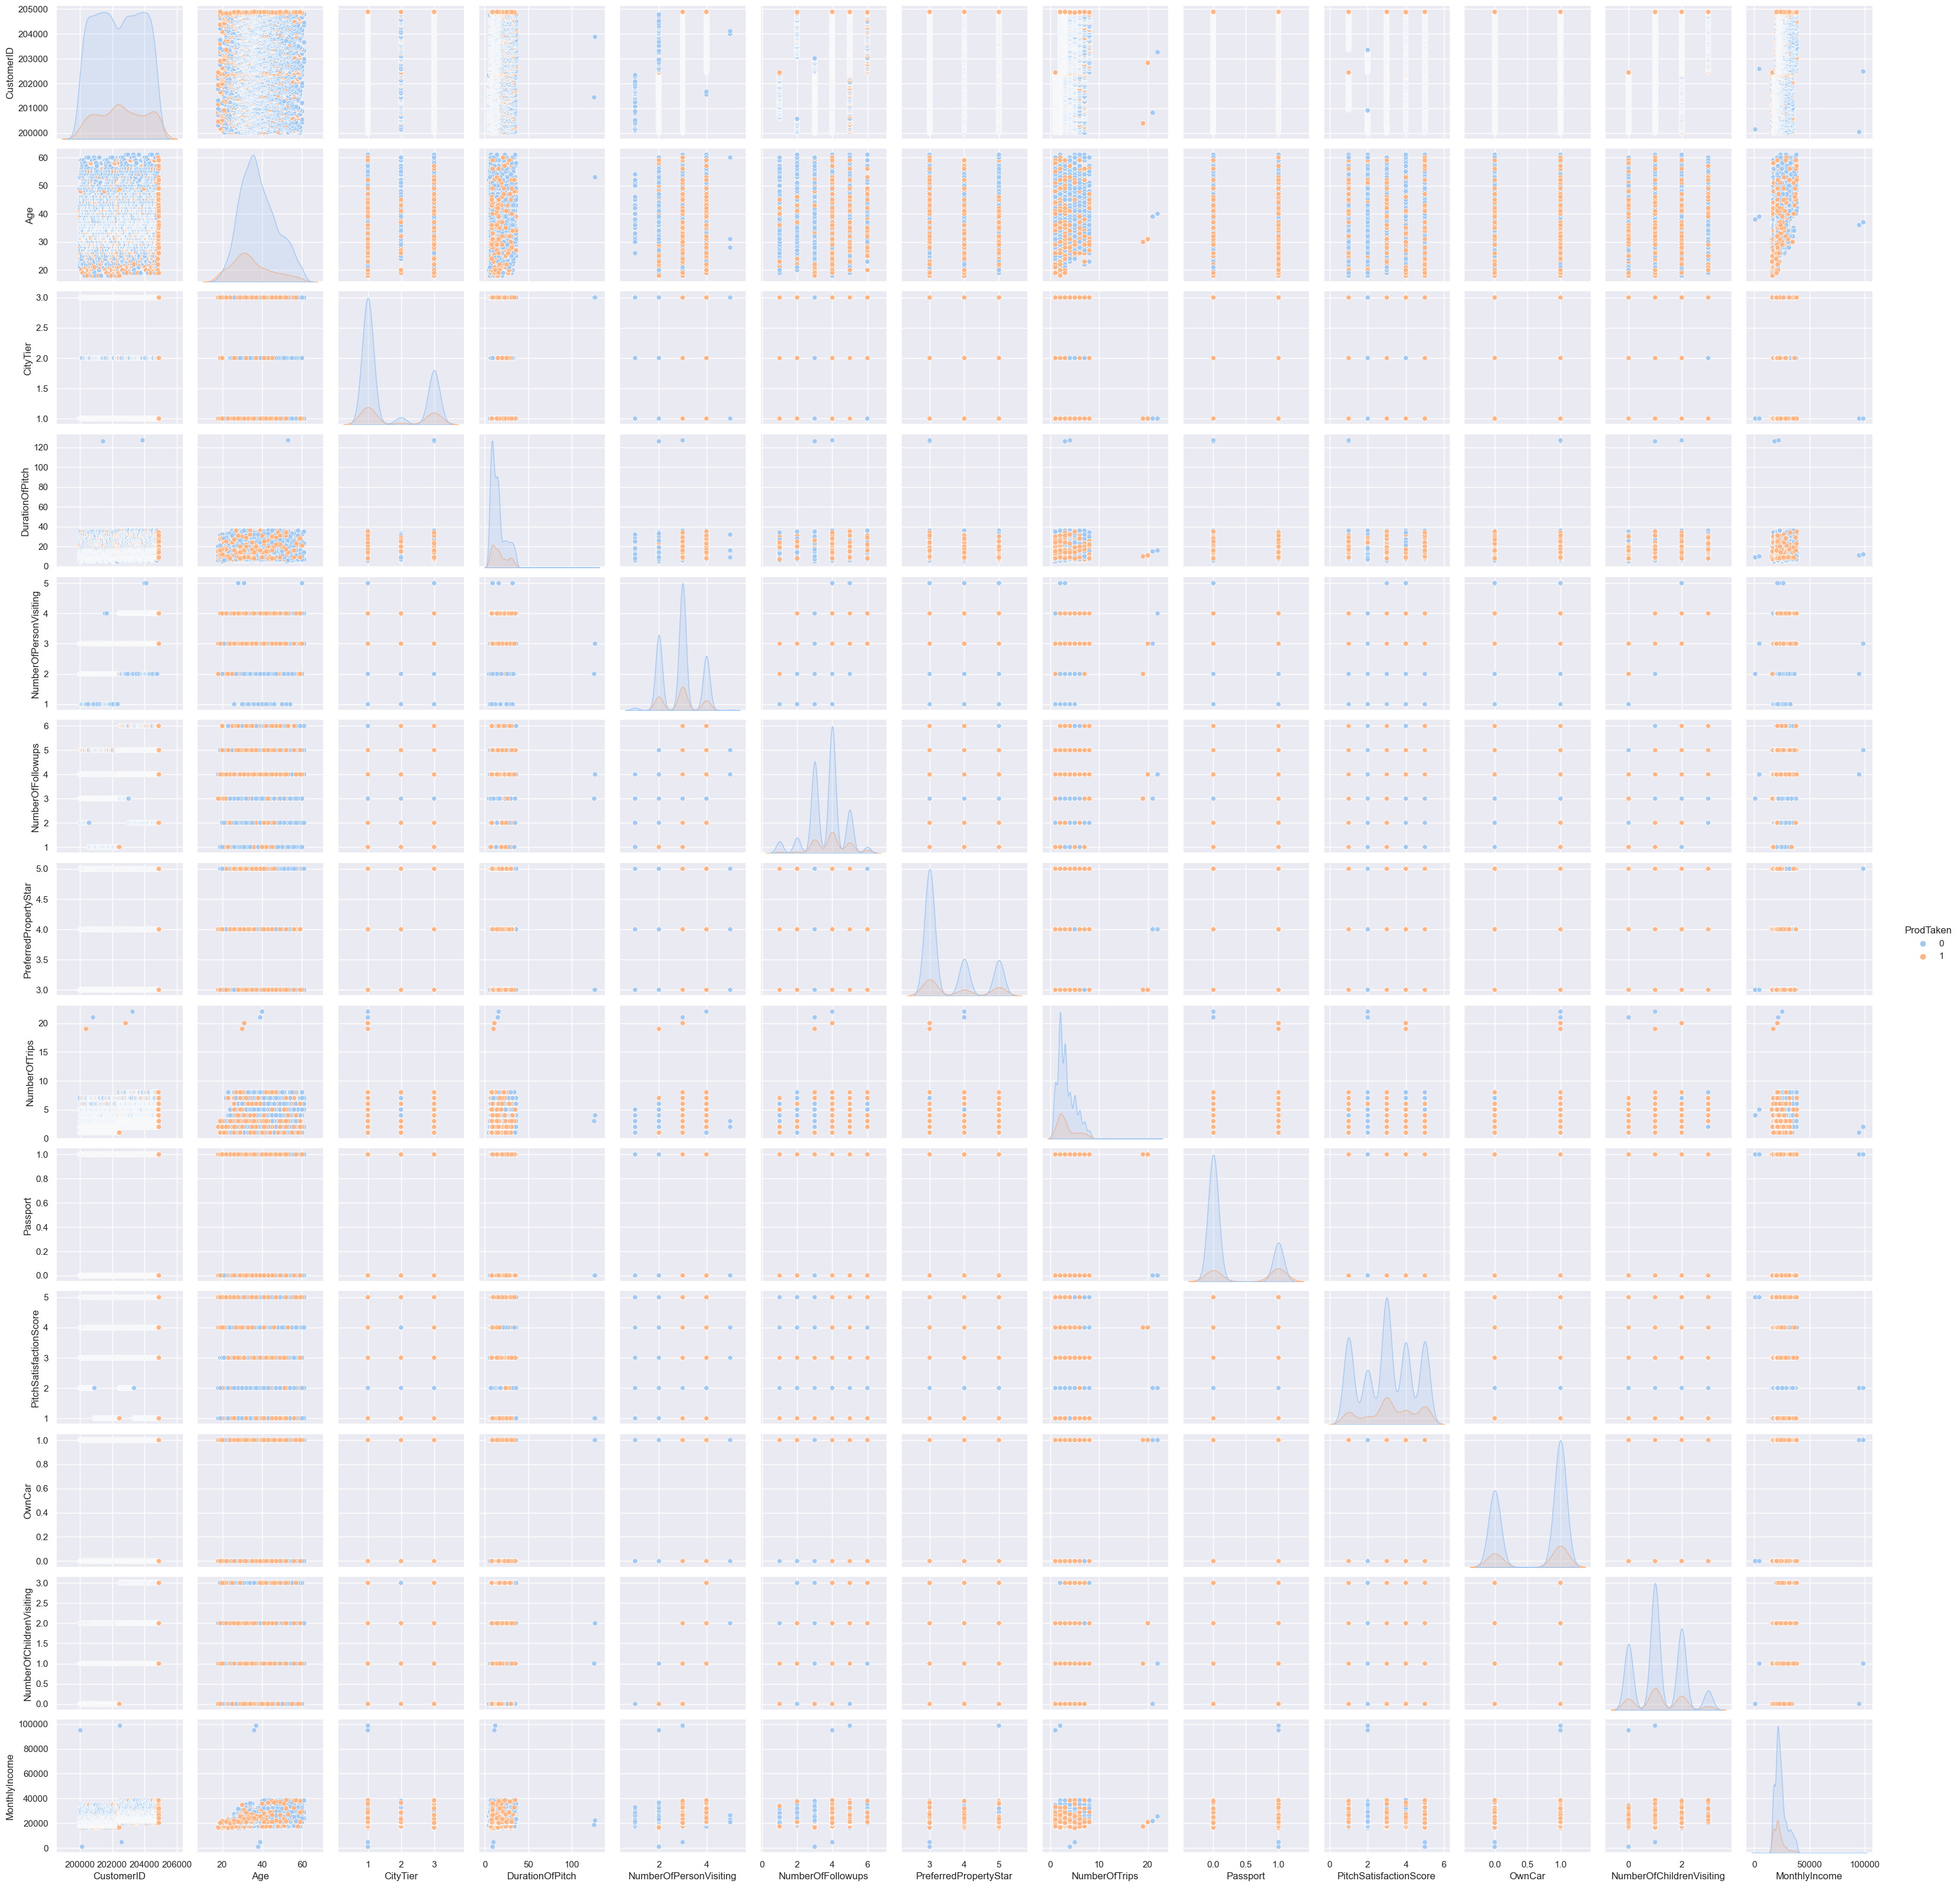

In [19]:
#create visualization data using pairplot

plt.figure(figsize=(20,20))
sns.pairplot(data, hue='ProdTaken', palette='pastel')
plt.show()

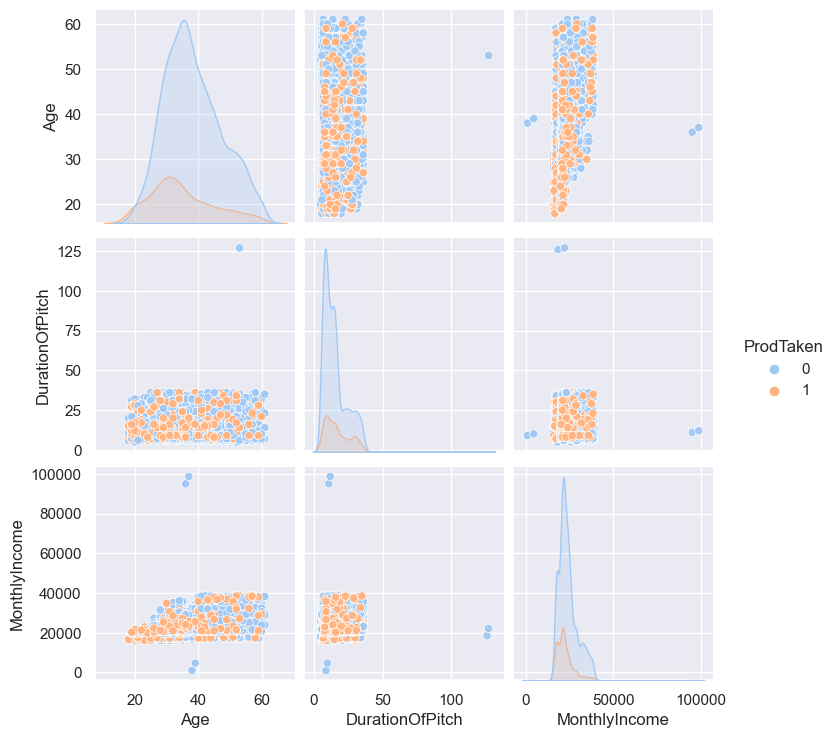

In [20]:
#create visualization using pairplot between numerical data and ProductTaken

sns.pairplot(data, hue='ProdTaken', vars=num, palette='pastel')
plt.show()



**INSIGHT**

     * Most customers in range age 20 until 45 years with monthly income .

    * Employees (`Salaried`) and `Small Business` owner prefer to take holiday packages.

    * The customer have passport prefer to take holiday packages, while the customers haven’t passport prefer to refusing the packages.

    * In range monthly income until 40K, customers who take the package are dominated by customers who have a frequency of traveling under 10 times a year.

    * The customers have car dominated to take holiday packages than customers haven’t a car.

    * Most customers take holiday packages are married or single, but divorced customers mostly refusing the packages.

    * Customers are given an offer with more conversation time, prefer to take the holiday packages even only view times offer, but the customers with short conversation time, mostly refusing the packages even they are repeatedly offered.


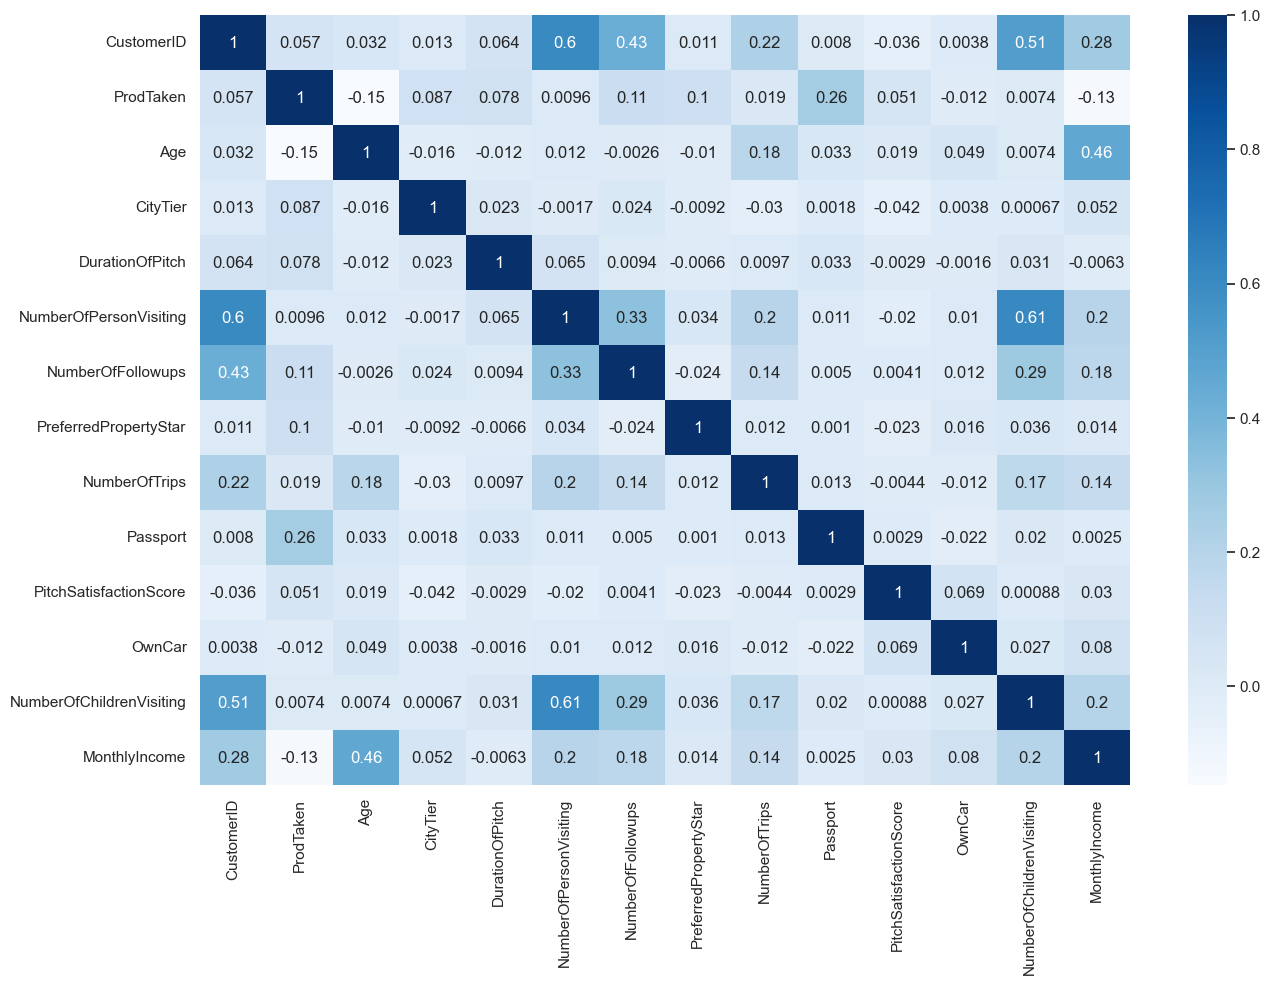

In [21]:
# let's create a correlation matrix 

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()



**INSIGHT**

    * The correlation between target variable (`ProdTaken`) and other variable is too small.The biggest correaltion is between `Prodtaken` with `Passport`, they have positve correlation.

    * Between `ProdTaken` with `MonthlyIncome` have negative correlation, just as between `ProTaken` with `Age`

    * The biggest variable correlation is between `NumberOfPersonVisiting` with `NumberOfChildrenVisiting`. It's must elimination the redundan value (have same information) to avoid overfitting at machine learning model.

### **4. Business Insight**

### 1. Does having passport affect the customer to take the holiday package?

In [22]:
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


#grouping data by Passport and Product Taken, with unique count of CustomerID

df_passport = data.groupby(['Passport','ProdTaken']).agg({'CustomerID' : ['nunique']}).reset_index()
df_passport.columns = ['Passport','ProdTaken','Total Customer']
df_passport


,Passport,ProdTaken,Total Customer
0,0,0,3040
1,0,1,426
2,1,0,928
3,1,1,494


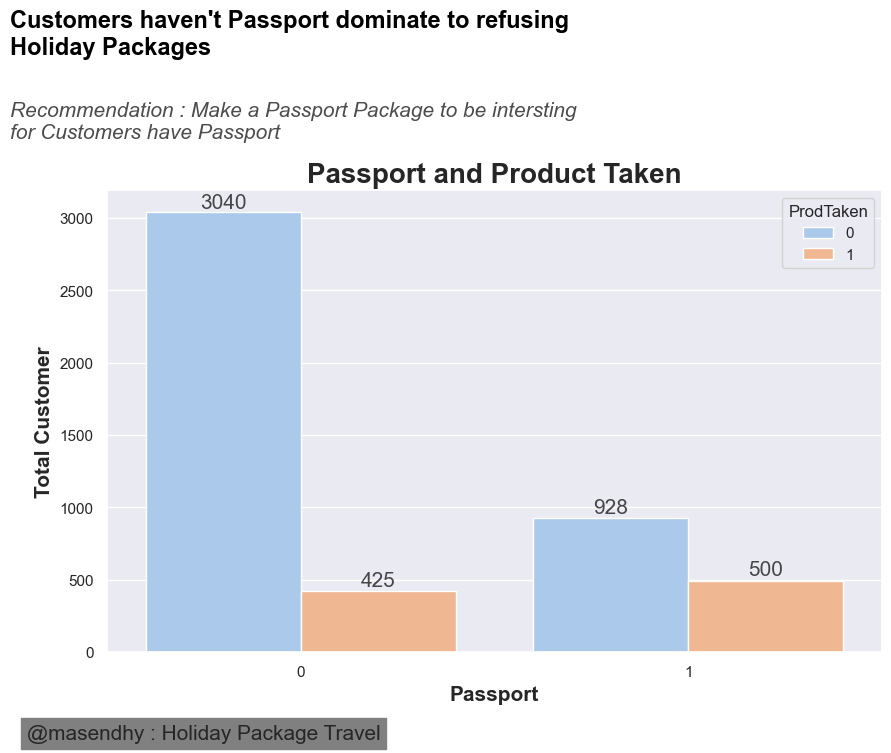

In [23]:
# create visualization for Passport and Product Taken

plt.figure(figsize=(10,6))
sns.barplot(x='Passport', y='Total Customer', hue='ProdTaken', data=df_passport, palette='pastel')
plt.title('Passport and Product Taken', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Passport',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Total Customer',fontdict={'fontsize': 15, 'fontweight': 'bold'})

# text for header
plt.text(x = 0-0.75, y = 3950
         , s = "Customers haven\'t Passport dominate to refusing \nHoliday Packages\n",
         fontsize = 17, color='black', backgroundcolor = 'white',fontweight='bold')

#text for subheader recommend
plt.text(x = 0-0.75, y = 3400,
         s= "Recommendation : Make a Passport Package to be intersting \nfor Customers have Passport\n",
            fontsize = 15, color='black', backgroundcolor = 'white', style='italic',alpha=0.7)


plt.text(x=0-0.20, y = 3040+30, s='3040', fontsize=15, color='black', alpha=0.7,ha='center')
plt.text(x= 0.20, y = 425+30, s='425', fontsize=15, color='black', alpha=0.7,ha='center')

plt.text(x=1-0.20, y = 928+30, s='928', fontsize=15, color='black', alpha=0.7,ha='center')
plt.text(x=1.4-0.20, y = 500+30, s='500', fontsize=15, color='black', alpha=0.7,ha='center')

# show footer text

plt.text(x = 0-0.25, y = -600,s='@masendhy : Holiday Package Travel',fontsize = 15, color='black', alpha=0.7,ha='center',backgroundcolor = 'grey')


#use style
style.use('seaborn-darkgrid')




### 2. Does the age affect the customer to take the holiday package?

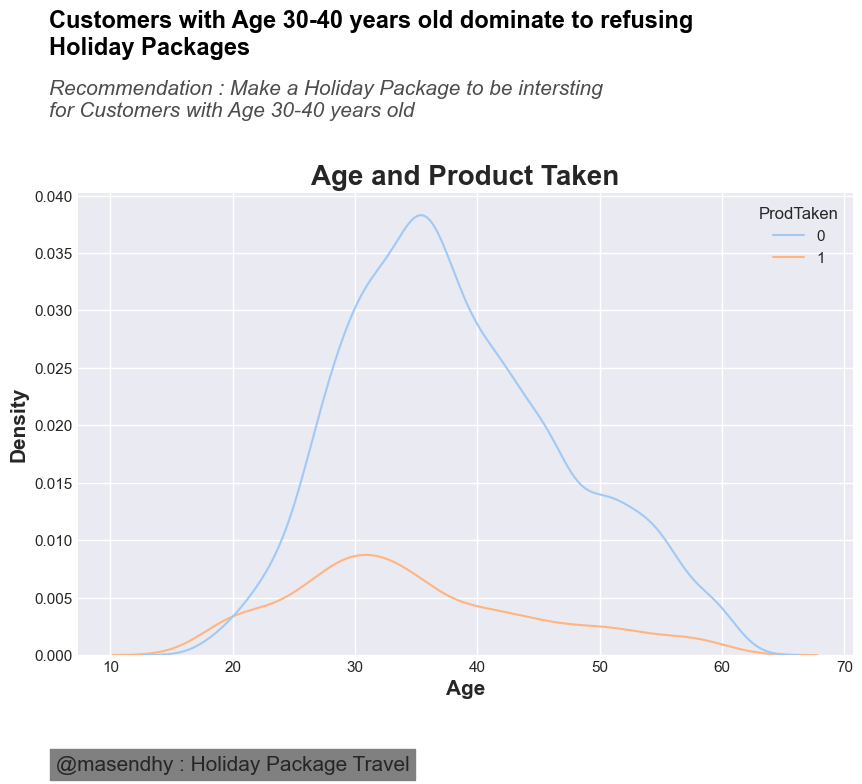

In [24]:
# create visualization for Age and Product Taken using kdeplot

plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Age', hue='ProdTaken', palette='pastel')
plt.title('Age and Product Taken', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Density',fontdict={'fontsize': 15, 'fontweight': 'bold'})

# text for header
plt.text(x = 5, y = 0.05, s = "Customers with Age 30-40 years old dominate to refusing \nHoliday Packages\n", fontsize = 17, color='black', backgroundcolor = 'white',fontweight='bold')

#text for subheader recommend
plt.text(x = 5, y = 0.045, s= "Recommendation : Make a Holiday Package to be intersting \nfor Customers with Age 30-40 years old\n", fontsize = 15, color='black', backgroundcolor = 'white', style='italic',alpha=0.7)

# show footer text
plt.text(x = 20, y = -0.01,s='@masendhy : Holiday Package Travel',fontsize = 15, color='black', alpha=0.7,ha='center',backgroundcolor = 'grey')

#use style
style.use('seaborn-darkgrid')


### 3. Does the monthly income affect the customer to take the holiday package?

Text(-16000, -90, ' ©masendhy : Holiday Package Travel')

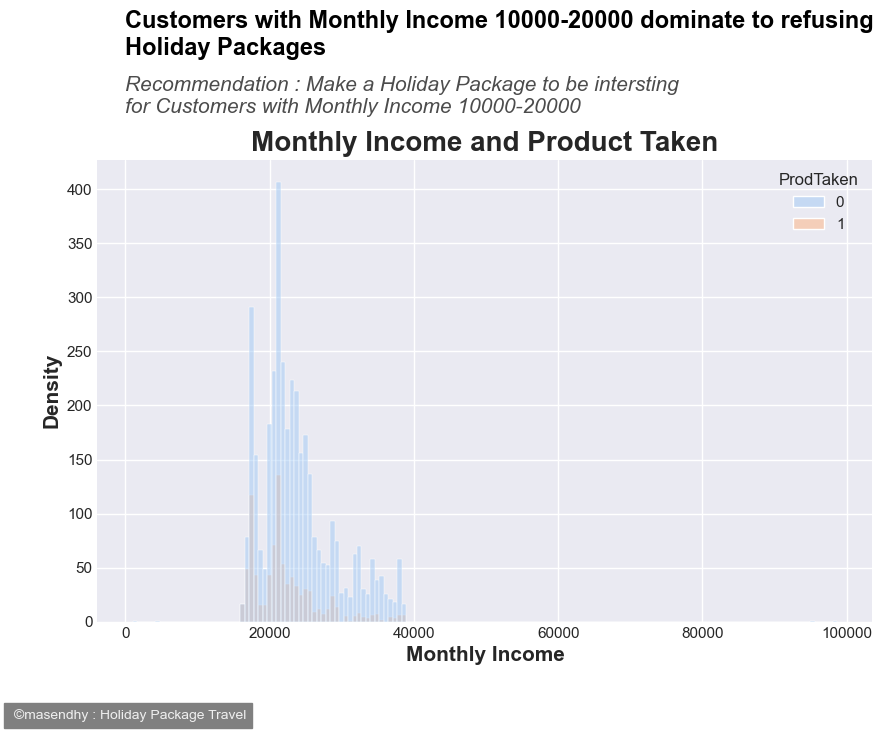

In [25]:
#create visualization for Montly Income and Product Taken using histogram

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='MonthlyIncome', hue='ProdTaken',color='ProdTaken')
plt.title('Monthly Income and Product Taken', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Monthly Income',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Density',fontdict={'fontsize': 15, 'fontweight': 'bold'})

# text for header
plt.text(x = 0, y = 500, s = "Customers with Monthly Income 10000-20000 dominate to refusing \nHoliday Packages\n", fontsize = 17, color='black', backgroundcolor = 'white',fontweight='bold')

#text for subheader recommend

plt.text(x = 0, y = 450, s= "Recommendation : Make a Holiday Package to be intersting \nfor Customers with Monthly Income 10000-20000\n", fontsize = 15, color='black', backgroundcolor = 'white', style='italic',alpha=0.7)

#use style
style.use('seaborn-darkgrid')

plt.text(x = -16000, y = -90,
    s = ' ©masendhy : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')
